In [1]:
import pandas as pd

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart.shape

(1025, 14)

In [5]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
import seaborn as sns


<Axes: xlabel='target', ylabel='count'>

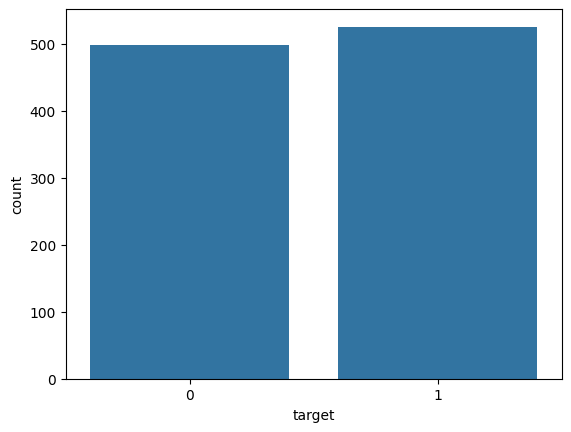

In [8]:
sns.countplot(x='target',data=heart)

In [9]:
df1=heart[heart['target']==0]

In [10]:
df2=heart[heart['target']==1]

In [12]:
df2=df2.sample(n=499)

In [13]:
new_heart=pd.concat([df1,df2])

In [15]:
new_heart.shape

(998, 14)

<Axes: xlabel='target', ylabel='count'>

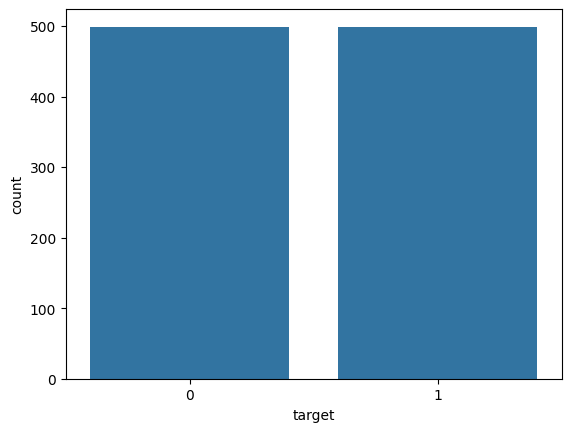

In [17]:
sns.countplot(x='target',data=new_heart)

In [21]:
x=new_heart.drop(['target'],axis=1)
y=new_heart.target

In [22]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
438   47    1   2       130   253    0        1      179      0      0.0   
355   46    0   0       138   243    0        0      152      1      0.0   
632   45    0   1       130   234    0        0      175      0      0.6   
877   43    0   2       122   213    0        1      165      0      0.2   
201   34    1   3       118   182    0        0      174      0      0.0   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [23]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
438    1
355    1
632    1
877    1
201    1
Name: target, Length: 998, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [40]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

min=MinMaxScaler()
x_train=min.fit_transform(x_train)
x_test=min.fit_transform(x_test)



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier(n_estimators=100)

In [43]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
pred=rf.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score


In [46]:
print(accuracy_score(y_test,pred))

0.99
